# Einführung
Dieses Notebook ist eine kleine Einführung in die Data Science Welt mit Python, dem Notebook-System Jupyter und dem Datenanalyse-Framework Pandas.

Die Aufgabe ist, aus dem Mitschnitt von Telefon-Metadaten herauszufinden, wo eine bestimmte Person wohnt. Das Notebook erklärt hierzu immer die Funktionsweisen und die Aufgaben der notwendigen Analyseschritte.

## Importieren von Bibliotheken
Als erstes wollen wir über den in Python üblichen Weg das Modul "Pandas" einbinden.

Generell können sog. Module auf mehrere Arten eingebunden werden:

* Einfaches Einbinden mittels `import <modul>`, z. B. `import pandas`
* Einbinden mit separatem Namen mittels `import <modul> as <name>`, z. B. `import pandas as pd`
* Einbinden eines Untermoduls mittels `from <hauptmodul> import <modul>`, z. B. `from matplotlib import pyplot`

Wir möchten gerne das Modul "Pandas" als `pd` einbinden.

Die Zelle können wir dann mit dem Tastenkürzel `Shift` + `Enter` ausführen.

In [23]:
import pandas as pd

### Interaktive Hilfe
Ob das Importieren des Moduls auch wirklich funktioniert hat, können wir prüfen, in dem wir mit dem `pd`-Modul arbeiten. Dazu hängen wir an die `pd`-Variable den `?` Operator an und führen die Zelle aus. Es erscheint die Dokumentation des Moduls im unteren Bereich des Notebooks. Diesen Bereich können wir durchlesen und mit der Taste `ESC` auch wieder verschwinden lassen.

In [20]:
pd?

Die weitere Funktionalität der Pandas-Bibliothek können wir erkunden, indem wir die Methoden von Pandas ansehen. Dazu verwenden wir `pd.` und nutzen die integrierte Autovervollständigung von Jupyter mittels der Tabulatortaste `Tab`, um zu sehen, welche Methoden uns Pandas bietet. Gehen wir dann mit der Pfeiltaste `unten` z. B. auf `Categorical`, drücken `Enter` und schließend `Shift`+ `Tab`, dann erscheint die Signatur des entsprechenden Funktionalität und der Ausschnitt der Hilfedokumentation. Bei zweimaligem Drücken von `Shift` + `Tab` erscheint die Hilfe vollständig.

In [24]:
pd.Categorical

pandas.core.categorical.Categorical

### Laden von Daten
Als nächstes Laden wir Telefon-Metadaten (sog. CDRs: Call Data Records) aus einer Datei mit kommaseparierten Daten (einer "CSV"-Datei: "Comma-separated values"). 

Pandas bietet hierzu eine Methode namens `read_csv`. Diese nimmt als ersten Parameter einen Pfad entgegen. Diverse andere Argumente können angegeben werden, um spezielle Varianten von CSV-Dateien einlesen zu können. Z. B.
* `sep`: Trennzeichen für Daten in einer Zeile wie etwa `sep=";"`
* `encoding`: andere Zeichenkodierungen wie etwa `encoding="latin-1"`
* `dtype`: Zuordnung von Spalten zu speziellen Datentypen wie etwa `dtype={ 0:str }`

Lesen wir erst einmal die Datei `data/CDR_data.csv` ohne jegliche Argumente ein. Diese Datei enthält die für 10 Mobilfunknutzer gesammelten Telefon-Metadaten über drei Jahre hinweg. Folgende Informationen sind darin enthalten:

* `In`: Die anrufende Telefonnummer 
* `Out`: Die ausgehende Telefonnummer
* `Direction`: Die Richtung des Telefonats
* `CallTimestamp`: Der Zeitstempel des Anrufs
* `Duration`: Die Dauer des Telefonats
* `TowerID`: Die ID des ersten Mobilfunkmasten, der beim Anruf genutzt wurde

Wir lesen die Daten ein und weisen das Ergebnis der Variable `cdr` zu. Mittels der Methode `head()` können wir uns dann die ersten fünf Einträge anzeigen lassen.

In [18]:
cdr = pd.read_csv('data/CDR_data.csv')
cdr.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID
0,4638472273,2666307251,Incoming,2010-12-25 07:16:24.736813,0:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec
1,4638472273,1755442610,Incoming,2010-12-25 21:18:30.053710,0:02:47.108750,aeaf8b43-8034-44fe-833d-31854a75acbf
2,4638472273,5481755331,Incoming,2010-12-25 14:52:42.878016,0:04:35.356341,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00
3,4638472273,1755442610,Incoming,2010-12-25 16:02:09.001913,0:02:23.498499,fadaa83f-6001-45fd-aa4a-17d6c6b7ec00
4,4638472273,2145623768,Incoming,2010-12-25 15:28:35.028554,0:03:54.692497,95d7920d-c3cd-4d20-a568-9a55800dc807


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot') # Look Pretty

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Data columns (total 6 columns):
In               53188 non-null object
Out              53188 non-null object
Direction        53188 non-null object
CallTimestamp    53188 non-null object
Duration         53188 non-null object
TowerID          53188 non-null object
dtypes: object(6)
memory usage: 2.4+ MB


In [4]:
df.CallTimestamp = pd.to_datetime(df.CallTimestamp)
df.Duration = pd.to_timedelta(df.Duration)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53188 entries, 0 to 53187
Data columns (total 6 columns):
In               53188 non-null object
Out              53188 non-null object
Direction        53188 non-null object
CallTimestamp    53188 non-null datetime64[ns]
Duration         53188 non-null timedelta64[ns]
TowerID          53188 non-null object
dtypes: datetime64[ns](1), object(4), timedelta64[ns](1)
memory usage: 2.4+ MB


In [16]:
phoneowners = pd.read_excel("data/phoneowners.xlsx")
phoneowners.head()

,Name,Number
0,Renee Molina,9204863989
1,Wendy Arnold,6115205038
2,Daniel Ellis,6707476992
3,Jason Bradshaw,8177960907
4,Francisco Brown,4443774214


In [9]:
phoneowners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
Name      999 non-null object
Number    999 non-null object
dtypes: object(2)
memory usage: 15.7+ KB


In [10]:
#Join them
phoneowners.columns = ['Name', 'In']
joined = pd.merge(df, phoneowners, on='In')
joined.head()

#But where are those towers?
#No for the tower data
towers = pd.read_csv("data/towers.csv")
joined = pd.merge(joined, towers, on='TowerID')
joined.head()

# result = pd.concat([df1, df4], axis=1, join_axes=[df1.index])

,In,Out,Direction,CallTimestamp,Duration,TowerID,Name,TowerLat,TowerLon
0,04638472273,02666307251,Incoming,2010-12-25 07:16:24.736813,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
1,04638472273,07922223441,Missed,2010-12-26 20:10:13.924779,00:02:49.402318,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
2,04638472273,07756914135,Incoming,2010-12-28 19:41:43.122708,00:05:08.460490,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
3,04638472273,04551601645,Incoming,2010-12-29 19:16:16.463142,00:04:20.380243,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
4,04638472273,06250348072,Incoming,2010-12-29 19:29:54.814022,00:03:18.870706,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417


In [11]:
joined['CallTimestamp'] = pd.to_datetime(joined['CallTimestamp'])
weekdays = joined['CallTimestamp'].dt.dayofweek.isin(Workweek) & joined['CallTimestamp'].dt.hour.isin(range(8,18))
dfweekdays = joined[weekdays]
dfweekdays.head()

NameError: name 'Workweek' is not defined

In [174]:
targetname = 'John Doe'
user1 = joined[joined['Name'] == targetname]
#user1 = user1[weekdays]
user1 = user1.reset_index(drop=True)
user1.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID,Name,TowerLat,TowerLon
0,04638472273,02666307251,Incoming,2010-12-25 07:16:24.736813,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
1,04638472273,07922223441,Missed,2010-12-26 20:10:13.924779,00:02:49.402318,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
2,04638472273,07756914135,Incoming,2010-12-28 19:41:43.122708,00:05:08.460490,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
3,04638472273,04551601645,Incoming,2010-12-29 19:16:16.463142,00:04:20.380243,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417
4,04638472273,06250348072,Incoming,2010-12-29 19:29:54.814022,00:03:18.870706,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417


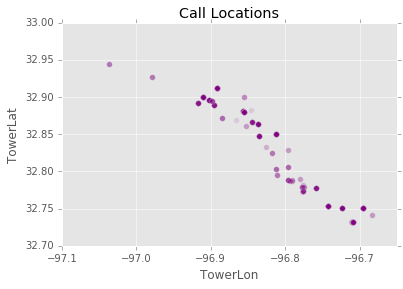

In [175]:
# INFO: Plot all the call locations
%matplotlib inline
#user1[['TowerLon', 'TowerLat']].plot.scatter()
user1.plot.scatter(x='TowerLon', y='TowerLat', c='purple', alpha=0.12, title='Call Locations', s = 30)
#showandtell()  # Comment this line out when you're ready to proceed

In [176]:
#
# INFO: The locations map above should be too "busy" to really wrap your head around. This is where domain expertise comes into play.
# Your intuition tells you that people are likely to behave differently on weekends:
#
# On Weekends:
#   1. People probably don't go into work
#   2. They probably sleep in late on Saturday
#   3. They probably run a bunch of random errands, since they couldn't during the week
#   4. They should be home, at least during the very late hours, e.g. 1-4 AM
#
# On Weekdays:
#   1. People probably are at work during normal working hours
#   2. They probably are at home in the early morning and during the late night
#   3. They probably spend time commuting between work and home everyday


#
# TODO: Add more filters to the user1 slice you created. Add bitwise logic so that you're only examining records that came in on
# weekends (sat/sun).
#
# .. your code here ..

user1['DOW'] = user1.CallTimestamp.dt.strftime("%a")

user1 = user1[(user1.DOW == 'Sat') | (user1.DOW == 'Sun')]
user1.head()
#
# TODO: Further filter it down for calls that are came in either before 6AM OR after 10pm (22:00:00). You can use < and > to compare
# the string times, just make sure you code them as military time strings, eg: "06:00:00", "22:00:00":
# https://en.wikipedia.org/wiki/24-hour_clock
#
# You might also want to review the Data Manipulation section for this. Once you have your filtered slice, print out its length:
#
# .. your code here ..

user1 = user1[(user1.CallTimestamp < "06:00:00") | (user1.CallTimestamp > "22:00:00")]
user1.head()

,In,Out,Direction,CallTimestamp,Duration,TowerID,Name,TowerLat,TowerLon,DOW
0,04638472273,02666307251,Incoming,2010-12-25 07:16:24.736813,00:02:41.741499,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417,Sat
1,04638472273,07922223441,Missed,2010-12-26 20:10:13.924779,00:02:49.402318,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417,Sun
5,04638472273,07756914135,Missed,2011-01-01 19:06:20.686967,00:02:19.405029,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417,Sat
14,04638472273,07841019020,Incoming,2011-01-30 18:56:08.650259,00:02:22.357491,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417,Sun
15,04638472273,05455269258,Incoming,2011-02-05 19:32:56.104492,00:00:30.595089,0db53dd3-eb9c-4344-abc5-c2d74ebc3eec,John Doe,32.731611,-96.709417,Sat


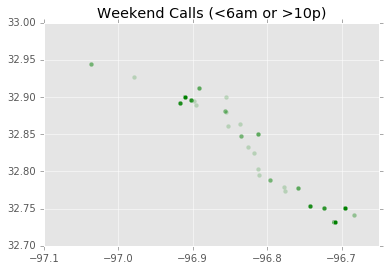

In [183]:
#
# INFO: Visualize the dataframe with a scatter plot as a sanity check. Since you're familiar with maps, you know well that your
# X-Coordinate should be Longitude, and your Y coordinate should be the tower Latitude. Check the dataset headers for proper column
# feature names.
# https://en.wikipedia.org/wiki/Geographic_coordinate_system#Geographic_latitude_and_longitude
#
# At this point, you don't yet know exactly where the user is located just based off the cell phone tower position data; but
# considering the below are for Calls that arrived in the twilight hours of weekends, it's likely that wherever they are bunched up
# is probably near the caller's residence:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(user1.TowerLon,user1.TowerLat, c='g', marker='o', alpha=0.2)
ax.set_title('Weekend Calls (<6am or >10p)')
#showandtell()  # TODO: Comment this line out when you're ready to proceed

#
# TODO: Run K-Means with a K=1. There really should only be a single area of concentration. If you notice multiple areas that are
# "hot" (multiple areas the usr spends a lot of time at that are FAR apart from one another), then increase K=2, with the goal being
# that one of the centroids will sweep up the annoying outliers; and the other will zero in on the user's approximate home location.
# Or rather the location of the cell tower closest to their home.....
#
# Be sure to only feed in Lat and Lon coordinates to the KMeans algo, since none of the other data is suitable for your purposes.
# Since both Lat and Lon are (approximately) on the same scale, no feature scaling is required. Print out the centroid locations and
# add them onto your scatter plot. Use a distinguishable marker and color.
#
# Hint: Make sure you graph the CORRECT coordinates. This is part of your domain expertise.
#
# .. your code here ..

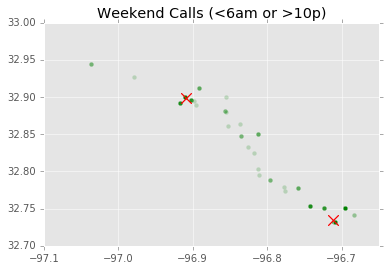

In [205]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2)
user1 = pd.concat([user1.TowerLon, user1.TowerLat], axis = 1)
labels = kmeans.fit_predict(user1)
centroids = kmeans.cluster_centers_
ax.scatter(x = centroids[:, 0], y = centroids[:, 1], c = 'r', marker = 'x', s = 100)
ax.figure
#showandtell()  # TODO: Comment this line out when you're ready to proceed

In [211]:
#coordinates = "" + centroids[0][1].to_string().split('.')[0] + "°" + centroids[0][1].split('.')[1][0]  + centroids[0][1].split('.')[1][1] + centroids[0][0]
#str.split(' ', 1 )
centroids

difference1 = centroids[0][1] - centroids[1][1]
difference2 = centroids[0][0] - centroids[1][0]

difference1 = 0.5 * difference1
difference2 = 0.5 * difference2

coordinate1 = centroids[0][1] + difference1
coordinate2 = centroids[0][0] + difference2

coordinates = str(coordinate1) + " " + str(coordinate2)
coordinates

#-96°90'92.4672"N  96°56'57.3"W

'32.9813029167 -97.0080512904'